<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/15_Time_series_analyis_of_Air_line_passenger_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time series analyis of Air line passenger dataset**


In [ ]:
# Plot ad hoc CIFAR10 instances
#from keras.datasets import cifar10

In [ ]:
# data processing and visualization libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
# Keras deep learning model libraries
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization , Conv2D ,MaxPool2D 
from tensorflow.keras.optimizers import SGD ,Adam
# data validation lib
from sklearn.model_selection import KFold

# Data Pre processing

In [ ]:
path='https://raw.githubusercontent.com/rohailkhan/data/main/international-airline-passengers.csv'
airline=pd.read_csv(path)
airline.head(2)

,"Month;""Passengers"""
0,1949-01;112
1,1949-02;118


In [ ]:
# method 1 using str.split and to_lis
def data_processing1(path):
  airline=pd.read_csv(path)
  
  airline=pd.DataFrame(airline['Month;"Passengers"'].str.split(';',1).tolist(),columns = ['years','passengers'])
  # we only need Passengers column
  airline=airline.drop(columns='years')
  # convert to values and float type
  airline=airline.values.astype('float')
  return airline


In [ ]:
# method 2 using lambda function with re.split
def data_processing2(path):
  airline=pd.read_csv(path)
  airline[['year','month','passengers']] = airline['Month;"Passengers"'].apply(lambda x: pd.Series(re.split('-|;',x)))
  # we only need passenger column
  airline.drop(columns=['Month;"Passengers"' ,'year',	'month'],inplace=True)
  # convert to values and float type
  airline=airline.values.astype('float')
  return airline


# Plotting after processing

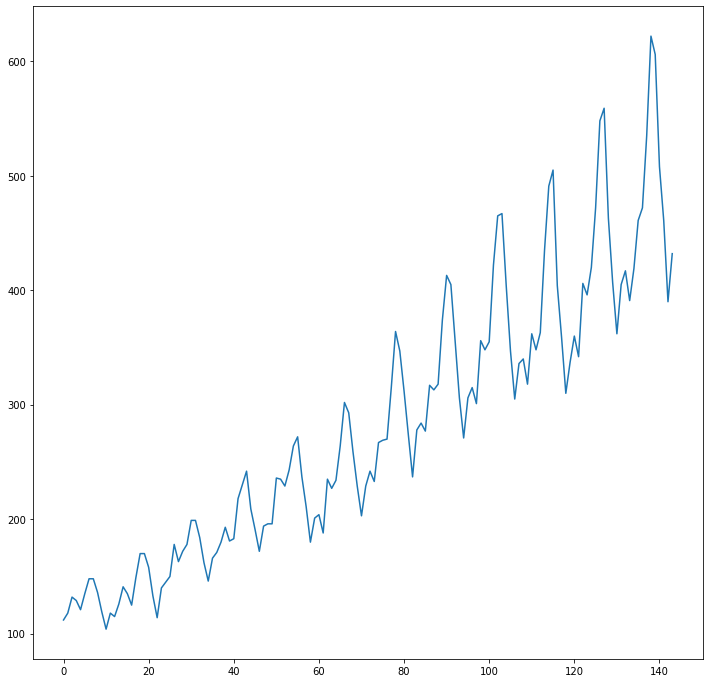

In [ ]:
fig=plt.figure(figsize=(12,12))
#ax.locator_params(nbins=10, axis='x')
plt.locator_params(nbins=10,axis ='y')
plt.plot(airline)
plt.show()

# Sliding window or Past values window

In [ ]:
#last member is a[143]
a[0] ,a[1] , a[2],a[3] ,a[143] , a[142] , a[141] 

(array([112.]),
 array([118.]),
 array([132.]),
 array([129.]),
 array([432.]),
 array([390.]),
 array([461.]),
 array([508.]))

In [ ]:
a=np.array([['aaa'], ['bbb'],['ccc'],['ddd'],['ddd'],['eee'],[419.],[461.],[472.],[535.],[622.],[606.],[508.], [461.],[390.],[432.]])

In [ ]:
a[0:0+1 , 0] , a[0+1] , a[1:1+1 , 0] , a[1+1] , a[2:2+1 , 0] , a[2+1] 

(array(['aaa'], dtype='<U5'),
 array(['bbb'], dtype='<U5'),
 array(['bbb'], dtype='<U5'),
 array(['ccc'], dtype='<U5'),
 array(['ccc'], dtype='<U5'),
 array(['ddd'], dtype='<U5'))

In [ ]:
def sliding_window(dataf, look_back):
  x,y=[] ,[]
  for i in range(data -1 - look_back):
    a=data[ i : (i + lookback),0]
    x.append(a)
    y.append(dataset[i + lookback])
  return np.array(x) , np.array(y)

    

# Train Test split (using 67% train)

In [ ]:
a=data_processing1(path)

In [ ]:
len(a) , int(144*0.67 ), len(a[:96]) ,len(a[96:]) ,96+48

(144, 96, 96, 48, 144)

In [ ]:
def train_test(data):
  split=int(0.67*100)
  train=data[ :split ]
  test=data[split:]

  return train, test 

# Prepare data for modelling

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back): 
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):# modified removing -1
    a = dataset[i:(i+look_back), 0] 
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

## Modify Train and Test

## Base Model

In [ ]:
def base_model(look_back):
  model = Sequential()
  model.add(Dense(8, input_dim=look_back, activation='relu'))
  model.add(Dense(1))
  return model

# Running all steps till training

In [ ]:
path='https://raw.githubusercontent.com/rohailkhan/data/main/international-airline-passengers.csv'

In [ ]:
data=data_processing1(path)

In [ ]:
train, test =train_test(data)

In [ ]:
def run_all(look_back=1,path=path):
  data=data_processing2(path)
  train, test =train_test(data)
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  model=base_model(look_back)
  model.compile(loss='mean_squared_error', optimizer='adam')
  history=model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)
  return history , model , trainX, trainY , testX, testY


In [ ]:
path='https://raw.githubusercontent.com/rohailkhan/data/main/international-airline-passengers.csv'
history , model, trainX, trainY , testX, testY=run_all(look_back=1,path=path)

Epoch 1/200
33/33 - 0s - loss: 36690.7773
Epoch 2/200
33/33 - 0s - loss: 31727.3340
Epoch 3/200
33/33 - 0s - loss: 27015.1680
Epoch 4/200
33/33 - 0s - loss: 22444.5605
Epoch 5/200
33/33 - 0s - loss: 18126.3418
Epoch 6/200
33/33 - 0s - loss: 14107.0771
Epoch 7/200
33/33 - 0s - loss: 10567.8457
Epoch 8/200
33/33 - 0s - loss: 7577.6094
Epoch 9/200
33/33 - 0s - loss: 5171.6201
Epoch 10/200
33/33 - 0s - loss: 3400.6995
Epoch 11/200
33/33 - 0s - loss: 2131.7864
Epoch 12/200
33/33 - 0s - loss: 1328.9452
Epoch 13/200
33/33 - 0s - loss: 841.3897
Epoch 14/200
33/33 - 0s - loss: 570.9653
Epoch 15/200
33/33 - 0s - loss: 433.4572
Epoch 16/200
33/33 - 0s - loss: 368.5135
Epoch 17/200
33/33 - 0s - loss: 340.1372
Epoch 18/200
33/33 - 0s - loss: 328.8599
Epoch 19/200
33/33 - 0s - loss: 325.1464
Epoch 20/200
33/33 - 0s - loss: 325.7948
Epoch 21/200
33/33 - 0s - loss: 323.3983
Epoch 22/200
33/33 - 0s - loss: 323.2609
Epoch 23/200
33/33 - 0s - loss: 322.2754
Epoch 24/200
33/33 - 0s - loss: 323.2455
Epoch 

# Save model and results history

In [ ]:
os.getcwd()


'/content'

In [ ]:
import os
path=os.getcwd() + '/sample_data'
model.save(filepath=path + '/model.h5',overwrite=True)

In [ ]:
# saving model history 
import json
# # Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

# # Save it under the form of a json file
history_path=path +'/history.json'
json.dump(str(history_dict), open(history_path, 'w'))

# Loading back (model and history

In [ ]:
history= json.load(open(history_path, 'r'))

In [ ]:
# Loading history from the save history
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history_1=ast.literal_eval(history)

In [ ]:
history_1.keys()

dict_keys(['loss'])

# Evaluation

In [ ]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

Train Score: 321.30 MSE (17.92 RMSE)
Test Score: 1853.44 MSE (43.05 RMSE)


# Predictions

In [ ]:
dataset=data_processing2(path)

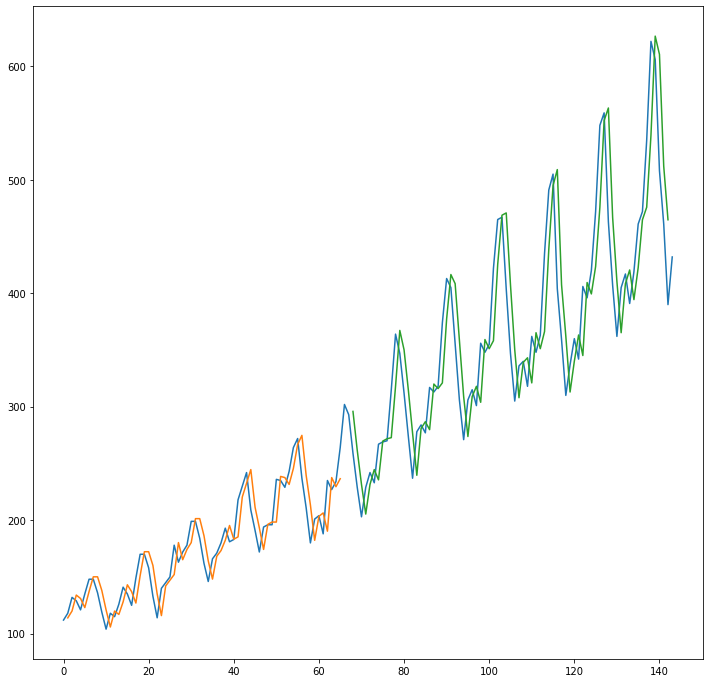

In [ ]:
# generate predictions for training
look_back=1
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig=plt.subplots(figsize=(12,12))
plt.plot(dataset)

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

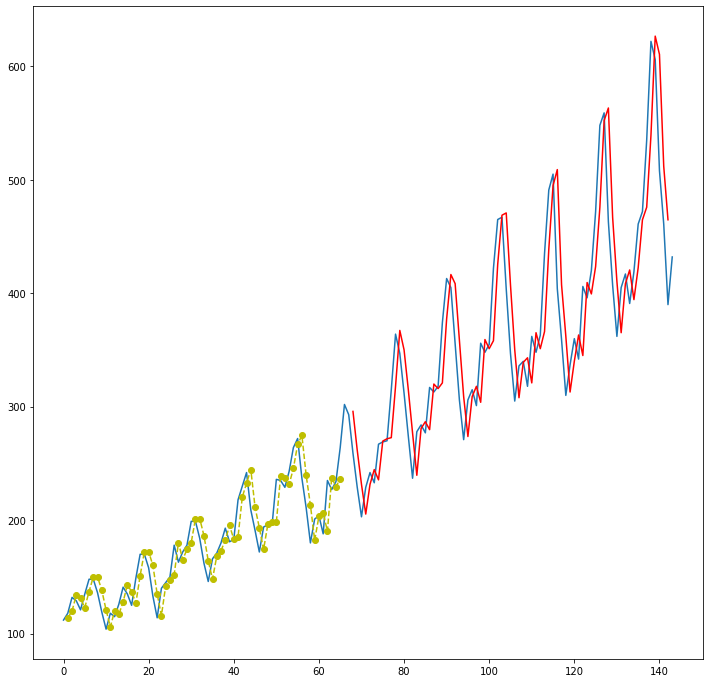

In [ ]:
# plot baseline and predictions
fig, ax =plt.subplots(figsize=(12,12))
ax.plot(dataset )

ax.plot(trainPredictPlot, color='y' , marker='o', linestyle='dashed')
ax.plot(testPredictPlot,color='r')
plt.show()

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
dataX, dataY = [], []
for i in range(len(dataset)-look_back-1):
a = dataset[i:(i+look_back), 0]
dataX.append(a)
dataY.append(dataset[i + look_back, 0])
return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)